# ML Regularized Logistic Regression - Using Neural Network
We will use a one-vs-all logistic regression to recognize hand-written digits.
The data set contains the images pixels row-wise (20x20) plus its label.

The digits are labeled from 1 to 10 where 10 is digit 0.

The NN parameters was already trained (provided in the exercise).

NN architecture:
Input layer: 400 units (image 20x20)
Hidden layer: 25 units
Output layer: 10 units (1 to 10)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sio
import random

## =========== Part 1: Loading and Visualizing Data =============

In [2]:
# Read the Matlab file that have inverted orientation and label 10 means digit 0
data = sio.loadmat('../ex3/ex3data1.mat')
x = data['X']
y = data['y']

[m, n] = np.shape(x)

# reshape Matlab matrix mx1 to numpy array 1xm
y = np.reshape(y, [m])

In [3]:
# Setup the parameters
input_layer_size  = 400 # 20x20 Input Images of Digits
hidden_layer_size = 25  # 25 hidden units
num_labels = 10         # 10 labels, from 0 to 9

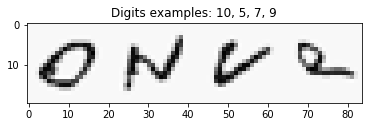

In [4]:
digitMatrix = np.column_stack([np.reshape(x[0], [20, 20]), np.zeros([20, 1]), \
                               np.reshape(x[2500], [20, 20]), np.zeros([20, 1]), \
                               np.reshape(x[3500], [20, 20]), np.zeros([20, 1]), \
                               np.reshape(x[4810], [20, 20]), np.zeros([20, 1])])
plt.title("Digits examples: %s, %s, %s, %s" % (y[0], y[2500], y[3500], y[4810]))
plt.imshow(digitMatrix, cmap='Greys', interpolation='nearest')

## ================ Part 2: Loading Pameters ================
In this part of the exercise, we load some pre-initialized neural network parameters.

In [5]:
print('Loading Saved Neural Network Parameters ...')
# Read the Matlab file
nn_weights = sio.loadmat('../ex3/ex3weights.mat')

Loading Saved Neural Network Parameters ...


In [6]:
Theta1 = nn_weights['Theta1']
Theta2 = nn_weights['Theta2']

print(Theta1.shape)
print(Theta2.shape)

(25, 401)
(10, 26)


## ================= Part 3: Implement Predict =================

We will use the sigmoid function as our activation function.

$g(z) = \frac{1}{1 + e^{-z}}$

When:

$z = 0$ then $g = 0.5$

$z \rightarrow +\infty$ then $g \rightarrow +1$

$z \rightarrow -\infty$ then $g \rightarrow 0$

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
def predict_looping(Theta1, Theta2, X):
    [m, n] = np.shape(X)
    
    p = np.zeros([m])
    
    for t in range(m):
        # === Activations from Input Layer (features) ===
        # add a1_0 = 1
        a1 = np.append(1, X[t])
        
        
        # === Activations from Hidden Layer ===
        k = np.shape(Theta1)[0] # qty units in Hidden Layer
        a2 = np.zeros([k])
        
        # Loop through Hidden Layer's units
        for j in range(k):
            z2_j = Theta1[j].dot(a1)
            a2[j] = sigmoid(z2_j)
        
        # add a2_0 = 1
        a2 = np.append(1, a2)
        
        
        # === Activations from Output Layer ===
        k = np.shape(Theta2)[0]
        a3 = np.zeros([k])
        
        # Loop through Output Layer's units
        for j in range(k):
            z3_j = Theta2[j].dot(a2)
            a3[j] = sigmoid(z3_j)
        
        
        # === softmax from our output (the index is our classification class) ===
        p[t] = np.argmax(a3) + 1 # +1 because the Matlab file is indexed 1-10
    return p

def predict_vectorial(Theta1, Theta2, X):
    # === Activations from Input Layer (features) ===
    # add a1_0 = 1
    a1 = np.column_stack([np.ones([m]), X])
    
    # === Activations from Hidden Layer ===
    z2 = a1.dot(Theta1.T)
    a2 = sigmoid(z2)
    # add a2_0 = 1
    a2 = np.column_stack([np.ones([m]), a2])
    
    # === Activations from Output Layer ===
    z3 = a2.dot(Theta2.T)
    a3 = sigmoid(z3)
    
    # === softmax from our output (the index is our classification class) ===
    p = np.argmax(a3, axis=1) + 1 # +1 because the Matlab file is indexed 1-10
    
    return p

In [9]:
pred = predict_vectorial(Theta1, Theta2, x)
print('Predictions:', pred[0], pred[2500], pred[3500], pred[4500])
print('Training Set Accuracy:', np.mean(pred == y) * 100) # Expect 97.5%

Predictions: 10 5 7 9
Training Set Accuracy: 97.52
